# K 均值 k-Means
## 算法实现 implementation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### 数据集 Dataset

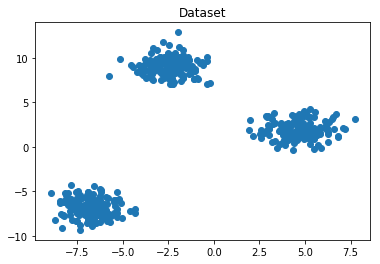

In [2]:
X, _ = make_blobs(centers=3, n_samples=500, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.title("Dataset")
plt.show()

In [3]:
class KMeans():
    def __init__(self, n_clusters=3, n_init=10):
        self.k = n_clusters
        self.centers = None
        self.n_init = n_init
    
    def l2_distance(self, X, centers):
        dists = np.sqrt(np.sum((centers - X)**2, axis=1))
        return dists
    
    def calc_cost(self, X, y, centers):
        y = np.array(y)
        return np.sum([np.sqrt(np.sum((centers[label] - X[y==label,:])**2, axis=1)).sum() for label in set(y)])
    
    def fit(self, X_train):
        n_samples, _ = X_train.shape
        min_cost = np.inf
        # 随机选择n次起始中心，选择最优结果
        n_iters = 0
        choices = []
        self.centers = X[np.random.choice(list(range(n_samples)), self.k)]
        for _ in range(self.n_init):
            # 随机选择中心点
            centers = X[np.random.choice(list(range(n_samples)), self.k)]
            old_y = None
            while True:
                y = [self.predict(x, centers) for x in X_train]
                
                if y == old_y:
                    break                
                old_y = y              
                # 计算代价 选择最小代价
                cost = self.calc_cost(X_train, y, centers)
                if cost < min_cost:
                    n_iters += 1
                    min_cost = cost
                    # 计算中心点
                    for cls in range(self.k):
                        points_idx = np.where(np.array(y) == cls)
                        cluster_points = X_train[points_idx]
                        self.centers[cls] = cluster_points.mean(axis=0)
        print(f"Training finished after {n_iters} iterations!")
        
    def predict(self, X_test, centers=None):
        if centers is None: centers=self.centers
        dists = self.l2_distance(X_test, centers)
        return np.argmin(dists)

In [4]:
clu = KMeans(n_clusters=3, n_init=10)
clu.fit(X)
clu.centers

Training finished after 2 iterations!


array([[-2.51336974,  9.03492867],
       [-6.83120002, -6.75657544],
       [ 4.61416263,  1.93184055]])

### 可视化 Visualize

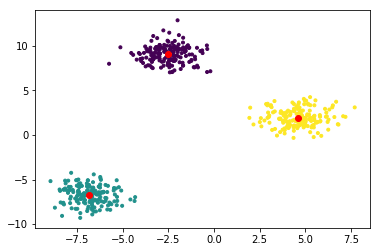

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.',c=[clu.predict(x) for x in X])
plt.scatter(clu.centers[:, 0], clu.centers[:,1], c='r')
plt.show()

## scikit-learn

In [6]:
from sklearn.cluster import KMeans

In [7]:
km_clu = KMeans(n_clusters=3,init='random',n_init=10)
km_clu.fit(X)
km_clu.cluster_centers_

array([[-6.83120002, -6.75657544],
       [ 4.61416263,  1.93184055],
       [-2.51336974,  9.03492867]])

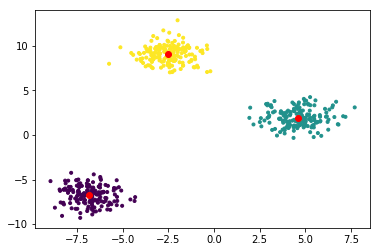

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='.',c=km_clu.labels_)
plt.scatter(km_clu.cluster_centers_[:, 0], km_clu.cluster_centers_[:,1], c='r')
plt.show()